**PDS ASSIGNMENT 3**

Import Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
dset = pd.read_csv('diabetes.csv')
dset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


1) Set a seed (to ensure work reproducibility) and take a random sample of 25 observations and find the mean Glucose and highest Glucose values of this sample and compare these statistics with the population statistics of the same variable. You should use charts for this comparison.

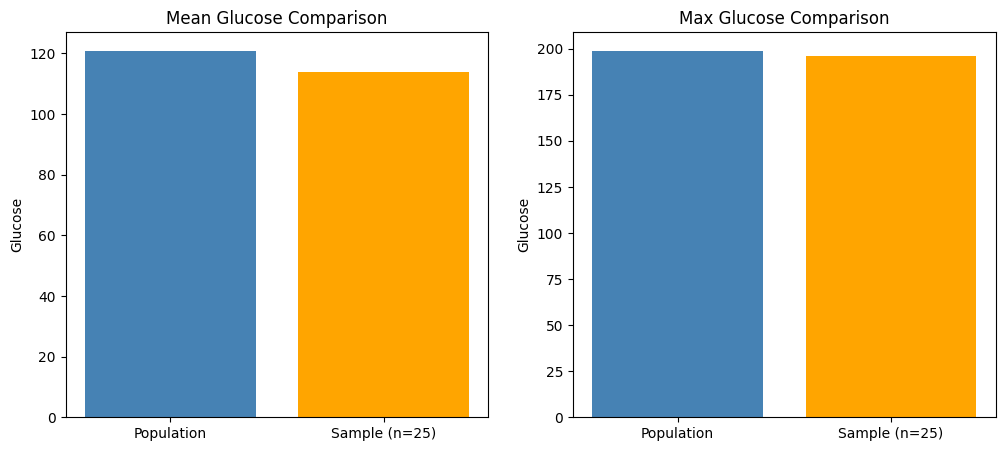

In [16]:
np.random.seed(50)
sample_dset = dset.sample(n=25)

# Mean and Max Glucose values
mean_glucose = dset['Glucose'].mean()
max_glucose = dset['Glucose'].max()
sample_mean_glucose = sample_dset['Glucose'].mean()
sample_max_glucose = sample_dset['Glucose'].max()

# DataFrame for plotting
glucose_dset = pd.DataFrame({
    'Group': ['Population', 'Sample (n=25)'],
    'Mean Glucose': [mean_glucose, sample_mean_glucose],
    'Max Glucose': [max_glucose, sample_max_glucose] })

# Plot Mean and Max Glucose
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].bar(glucose_dset['Group'], glucose_dset['Mean Glucose'], color=['steelblue', 'orange'])
axs[0].set_title('Mean Glucose Comparison')
axs[0].set_ylabel('Glucose')

axs[1].bar(glucose_dset['Group'], glucose_dset['Max Glucose'], color=['steelblue', 'orange'])
axs[1].set_title('Max Glucose Comparison')
axs[1].set_ylabel('Glucose')

plt.show()

2) Find the 98th percentile of BMI of your sample and the population and compare the results using charts.

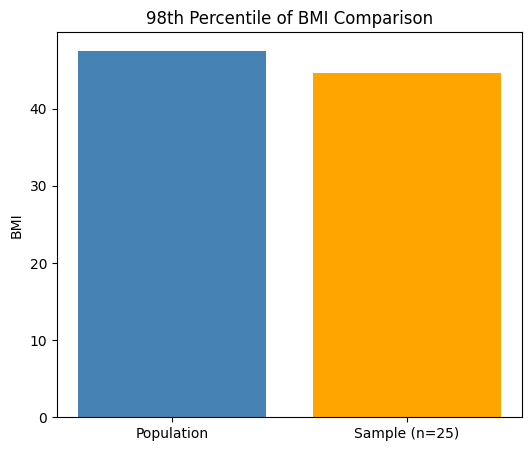

,Group,98th Percentile BMI
0,Population,47.526
1,Sample (n=25),44.676


In [17]:
bmi = np.percentile(dset['BMI'], 98)
sample_bmi = np.percentile(sample_dset['BMI'], 98)

# DataFrame
bmi_dset = pd.DataFrame({
    'Group': ['Population', 'Sample (n=25)'],
    '98th Percentile BMI': [bmi, sample_bmi] })

plt.figure(figsize=(6, 5))
plt.bar(bmi_dset['Group'], bmi_dset['98th Percentile BMI'], color=['steelblue', 'orange'])
plt.title('98th Percentile of BMI Comparison')
plt.ylabel('BMI')
plt.show()

bmi_dset

3) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the population and find the average mean, standard deviation and percentile for BloodPressure and compare this with these statistics from the population for the same variable. Again, you should create charts for this comparison. Report on your findings.

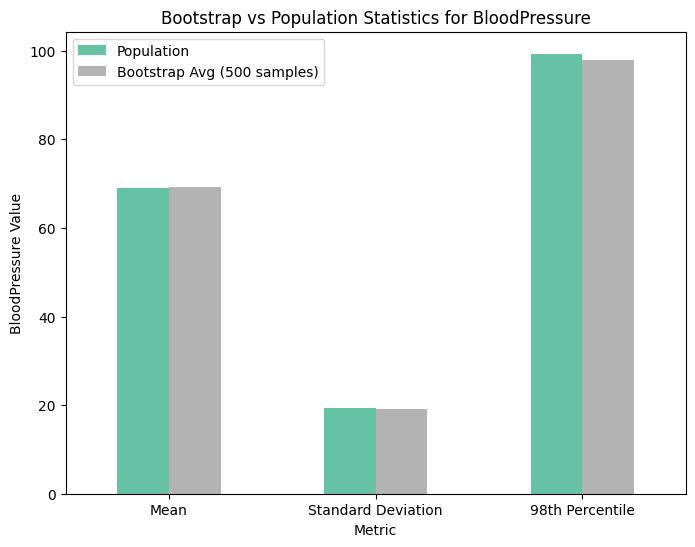



                Metric  Population  Bootstrap Avg (500 samples)
0                Mean   69.105469                    69.176920
1  Standard Deviation   19.355807                    19.073718
2     98th Percentile   99.320000                    97.902440


In [18]:
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

np.random.seed(42)
for _ in range(500):
    sample = dset['BloodPressure'].sample(n=150, replace=True)
    bootstrap_means.append(sample.mean())
    bootstrap_stds.append(sample.std())
    bootstrap_percentiles.append(np.percentile(sample, 98))

# Bootstrap stats (averages over 500 samples)
avg_mean_bp = np.mean(bootstrap_means)
avg_std_bp = np.mean(bootstrap_stds)
avg_98th_bp = np.mean(bootstrap_percentiles)

# Population stats
pop_mean_bp = dset['BloodPressure'].mean()
pop_std_bp = dset['BloodPressure'].std()
pop_98th_bp = np.percentile(dset['BloodPressure'], 98)

# Create DataFrame
bp_stats_df = pd.DataFrame({
    'Metric': ['Mean', 'Standard Deviation', '98th Percentile'],
    'Population': [pop_mean_bp, pop_std_bp, pop_98th_bp],
    'Bootstrap Avg (500 samples)': [avg_mean_bp, avg_std_bp, avg_98th_bp] })

# Plot comparison
bp_stats_df.set_index('Metric').plot(kind='bar', figsize=(8, 6), colormap='Set2')
plt.title('Bootstrap vs Population Statistics for BloodPressure')
plt.ylabel('BloodPressure Value');plt.xticks(rotation=0)
plt.show()

print("\n\n",bp_stats_df)